<a href="https://colab.research.google.com/github/Akshithaa25/AdvancedML_Methods/blob/main/2348502_Program_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer,load_iris,load_diabetes

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


In [8]:
cancer_df = load_breast_cancer()
print(cancer_df.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [9]:
cancer_df.keys()


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [10]:
df = pd.DataFrame(cancer_df.data,columns = cancer_df.feature_names)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [11]:
cancer_df.target_names

array(['malignant', 'benign'], dtype='<U9')

The detection of malignancy signifies the existence of cancerous cells in breast tissue, implying their harmful nature. Conversely, benign findings indicate the lack of cancerous cells, suggesting that the cells appear normal and are not harmful or cancerous. Following this, the data will undergo Principal Component Analysis (PCA) to identify principal components, projecting the information into lower dimensions.

In [12]:
X, y = cancer_df.data, cancer_df.target

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [15]:

classifiers = [
        ('K-Nearest Neighbors', KNeighborsClassifier()),
        ('Decision Tree', DecisionTreeClassifier(random_state=42)),
        ('Random Forest', RandomForestClassifier(random_state=42))
  ]

In [16]:
for clf_name, clf in classifiers:
  print(f"{clf_name}:")
  print("Before Dimensionality Reduction : ")
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  acc_bef_reduction = accuracy_score(y_test,y_pred)
  print(f"Accuracy Score: {acc_bef_reduction:.4f} ")


K-Nearest Neighbors:
Before Dimensionality Reduction : 
Accuracy Score: 0.9591 
Decision Tree:
Before Dimensionality Reduction : 
Accuracy Score: 0.9415 
Random Forest:
Before Dimensionality Reduction : 
Accuracy Score: 0.9708 


In [17]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

In [18]:
for clf_name, clf in classifiers:
  print(f"{clf_name}:")
  print("After PCA Dimensionality Reduction : ")
  clf.fit(X_train_pca,y_train)
  y_pred = clf.predict(X_test_pca)
  acc_bef_reduction = accuracy_score(y_test,y_pred)
  print(f"Accuracy Score: {acc_bef_reduction:.4f} ")

K-Nearest Neighbors:
After PCA Dimensionality Reduction : 
Accuracy Score: 0.9357 
Decision Tree:
After PCA Dimensionality Reduction : 
Accuracy Score: 0.9298 
Random Forest:
After PCA Dimensionality Reduction : 
Accuracy Score: 0.9532 


The decline in accuracy observed after employing PCA for dimensionality reduction may indicate that the condensed feature space fails to encompass sufficient information for these classifiers to maintain their initial performance.

Although the random forest exhibited a relatively higher accuracy compared to KNN and Decision Tree post-PCA, it still encountered a slight decrease in accuracy.

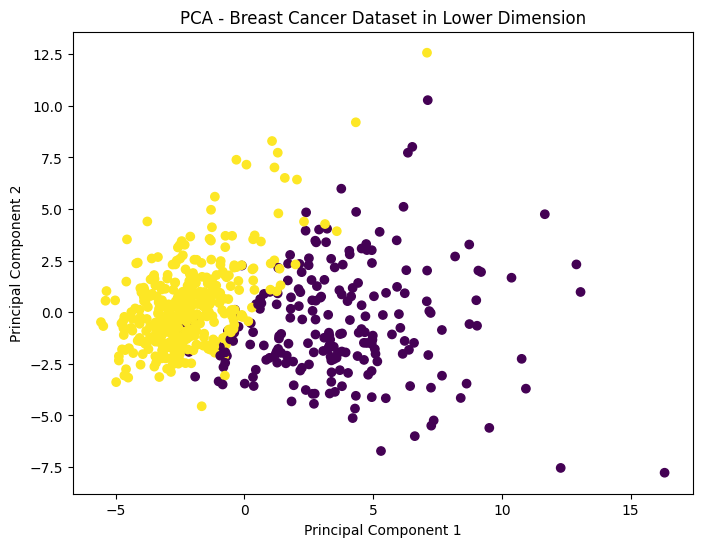

In [21]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=cancer_df.target)
plt.title('PCA - Breast Cancer Dataset in Lower Dimension')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

INFERENCE: The plot illustrates the data being clustered into two distinct groups.

PC1 represents a weighted sum of all the original features, with the weights chosen to capture the most variance in the data. PC1 is associated with the size and shape of the tumor.

PC2, uncorrelated with PC1, also represents a weighted sum of all the original features. It is likely related to the texture of the cells or the amount of blood supply to the tumor.

Upon performing LDA, the maximum number of components that can be extracted is constrained by the formula min(n_features, n_classes - 1). In a dataset with 30 features and 2 classes, the maximum number of components that can be extracted using LDA would be (30, 2-1) = 1.  

In [22]:
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X_scaled, cancer_df.target)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

In [23]:
for clf_name, clf in classifiers:
  print(f"{clf_name}:")
  print("After LDA Dimensionality Reduction : ")
  clf.fit(X_train_lda,y_train)
  y_pred = clf.predict(X_test_lda)
  acc_bef_reduction = accuracy_score(y_test,y_pred)
  print(f"Accuracy Score: {acc_bef_reduction:.4f} ")

K-Nearest Neighbors:
After LDA Dimensionality Reduction : 
Accuracy Score: 0.9532 
Decision Tree:
After LDA Dimensionality Reduction : 
Accuracy Score: 0.9532 
Random Forest:
After LDA Dimensionality Reduction : 
Accuracy Score: 0.9532 


INFERENCE:  All classifiers achieve an accuracy score of 0.9532, indicating that LDA effectively reduced the feature space to a lower-dimensional representation while retaining essential class-discriminatory information.  

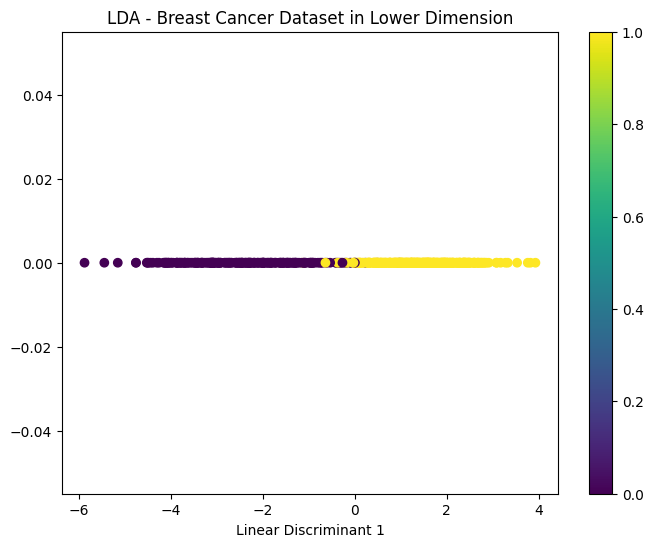

In [29]:
plt.figure(figsize=(8,6))
plt.scatter(X_lda,[0] * len(X_lda), c = cancer_df.target)
plt.title('LDA - Breast Cancer Dataset in Lower Dimension')
plt.xlabel('Linear Discriminant 1')
plt.colorbar()
plt.show()

INFERENCE: This suggests that LDA has reduced the data to one dimension that maximizes the separation between the classes.

The overlap of data points suggests that the classes are not perfectly separable in this one-dimensional representation. Data points more to the left are likely more indicative of one class ("malignant"), while the right side indicates the other class ("benign").  

Iris Dataset

In [31]:
iris_df = load_iris()
print(iris_df.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [32]:
iris_df.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [33]:
df_features = pd.DataFrame(iris_df.data,columns = iris_df.feature_names)
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [34]:
iris_df.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Apply PCA find principal components and project in the lower dimensions

Splitting the data into features and target

In [35]:
X, y = iris_df.data, iris_df.target

In [36]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [38]:
classifiers = [
        ('K-Nearest Neighbors', KNeighborsClassifier()),
        ('Decision Tree', DecisionTreeClassifier(random_state=42)),
        ('Random Forest', RandomForestClassifier(random_state=42))
  ]

In [39]:
for clf_name, clf in classifiers:
  print(f"{clf_name}:")
  print("Before Dimensionality Reduction : ")
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  acc_bef_reduction = accuracy_score(y_test,y_pred)
  print(f"Accuracy Score: {acc_bef_reduction:.4f} ")


K-Nearest Neighbors:
Before Dimensionality Reduction : 
Accuracy Score: 1.0000 
Decision Tree:
Before Dimensionality Reduction : 
Accuracy Score: 1.0000 
Random Forest:
Before Dimensionality Reduction : 
Accuracy Score: 1.0000 


APPLYING PCA


In [40]:

pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)



In [41]:
for clf_name, clf in classifiers:
  print(f"{clf_name}:")
  print("After PCA Dimensionality Reduction : ")
  clf.fit(X_train_pca,y_train)
  y_pred = clf.predict(X_test_pca)
  acc_bef_reduction = accuracy_score(y_test,y_pred)
  print(f"Accuracy Score: {acc_bef_reduction:.4f} ")

K-Nearest Neighbors:
After PCA Dimensionality Reduction : 
Accuracy Score: 0.8444 
Decision Tree:
After PCA Dimensionality Reduction : 
Accuracy Score: 0.9111 
Random Forest:
After PCA Dimensionality Reduction : 
Accuracy Score: 0.8889 



The decline in accuracy scores across all classifiers (KNN, Decision Tree, Random Forest) after employing PCA for dimensionality reduction implies that the transformation to lower dimensions might have led to the loss of crucial information essential for effective classification.

Despite Decision Tree and Random Forest retaining higher accuracies in comparison to KNN following PCA, all classifiers experienced a reduction in accuracy when functioning in the reduced feature space.

To gain a better understanding of the impact of PCA, visualizing the iris dataset in a lower dimension could provide valuable insights.

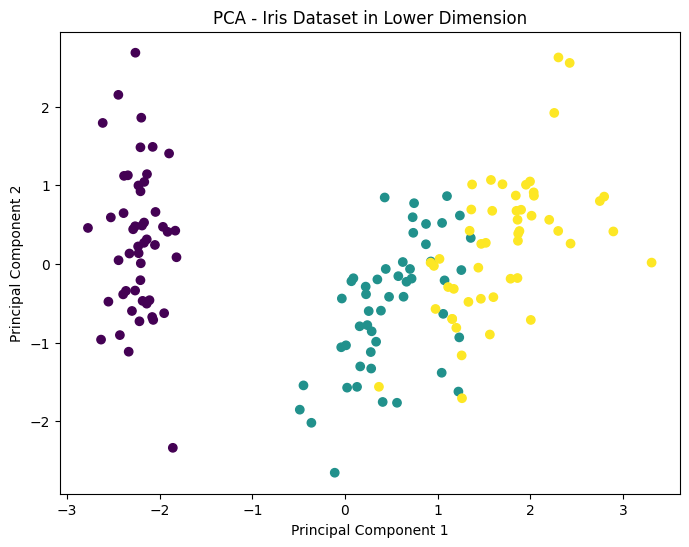

In [42]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=iris_df.target)
plt.title('PCA - Iris Dataset in Lower Dimension')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

APPLY LDA


In [43]:
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X_scaled, iris_df.target)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)


In [45]:
for clf_name, clf in classifiers:
  print(f"{clf_name}:")
  print("After LDA Dimensionality Reduction : ")
  clf.fit(X_train_lda,y_train)
  y_pred = clf.predict(X_test_lda)
  acc_bef_reduction = accuracy_score(y_test,y_pred)
  print(f"Accuracy Score: {acc_bef_reduction:.4f} ")

K-Nearest Neighbors:
After LDA Dimensionality Reduction : 
Accuracy Score: 0.9778 
Decision Tree:
After LDA Dimensionality Reduction : 
Accuracy Score: 0.9556 
Random Forest:
After LDA Dimensionality Reduction : 
Accuracy Score: 0.9556 


The accuracy assessments imply that the transformed space achieved through Linear Discriminant Analysis (LDA) holds more discriminative information crucial for KNN classification when contrasted with PCA.

Furthermore, both the decision tree and random forest models exhibit enhanced accuracy following LDA in comparison to their performance after PCA.

In the context of the iris dataset, it appears that LDA proves to be a superior choice for dimensionality reduction.

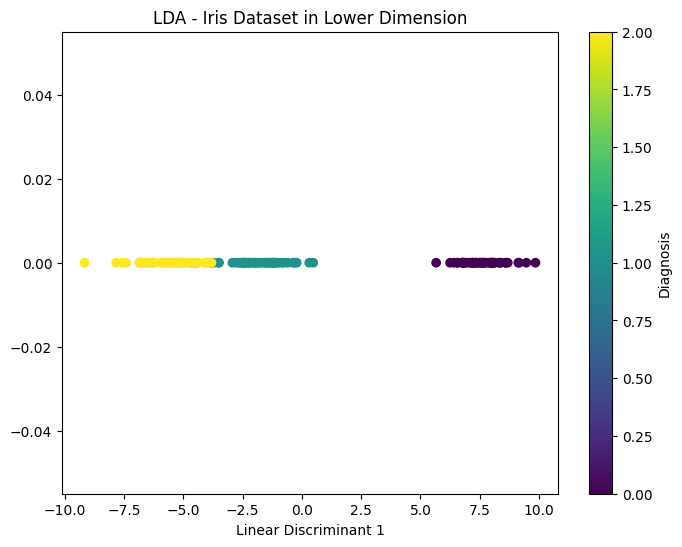

In [48]:
plt.figure(figsize=(8,6))
plt.scatter(X_lda,[0] * len(X_lda), c = iris_df.target)
plt.title('LDA - Iris Dataset in Lower Dimension')
plt.xlabel('Linear Discriminant 1')
plt.colorbar(label='Diagnosis')
plt.show()

The data points are clustered into three distinct groups along this axis, suggesting the presence of three iris species in the dataset.

There's some degree of overlap between the clusters, with most overlap occuring between the clusters on the left and the middle of the plot.

Pima Diabetes Dataset

In [49]:
df = pd.read_csv('/content/diabetes2.csv')

In [50]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [52]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Splitting features and target variables

In [53]:

X = df[['Age','BMI','Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','DiabetesPedigreeFunction']]
y = df['Outcome']


In [54]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Standadize the features

In [55]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

APPLYING PCA


In [56]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


In [57]:
principal_df = pd.DataFrame(data=principal_components, columns=['PC1','PC2'])

In [58]:
final_df = pd.concat([principal_df,y],axis=1)

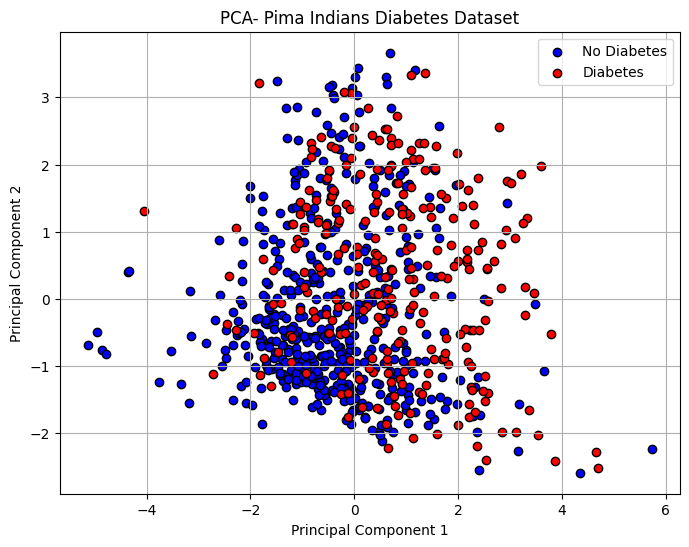

In [62]:
plt.figure(figsize=(8,6))
targets = [0,1]
# colors = ['blue','red']
for target, color in zip(targets,colors):
  indices = final_df['Outcome'] == target
  plt.scatter(final_df.loc[indices,'PC1'],
              final_df.loc[indices,'PC2'],
              c=color,
              label=target,
              edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA- Pima Indians Diabetes Dataset')
plt.legend(['No Diabetes','Diabetes'])
plt.grid(True)
plt.show()

In [63]:
#Variance of coefficients

print("Variance of coefficients for each principal component:")
print(pca.explained_variance_ratio_)

Variance of coefficients for each principal component:
[0.25533281 0.22070281]


PC1 retains more information from the original dataset than PC2.

APPLY LDA

In [64]:
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X_scaled,y)
X_train_lda = lda.fit_transform(X_train_scaled,y_train)
X_test_lda = lda.transform(X_test_scaled)


In [65]:

lda_df = pd.DataFrame(data=X_lda,columns=['LD1'])

In [66]:
final_df = pd.concat([lda_df,y],axis=1)
print(final_df)

          LD1  Outcome
0    1.380247        1
1   -1.564524        0
2    1.766185        1
3   -1.690588        0
4    2.207268        1
..        ...      ...
763  0.112889        0
764  0.044506        0
765 -0.484970        0
766 -0.013594        1
767 -1.280089        0

[768 rows x 2 columns]


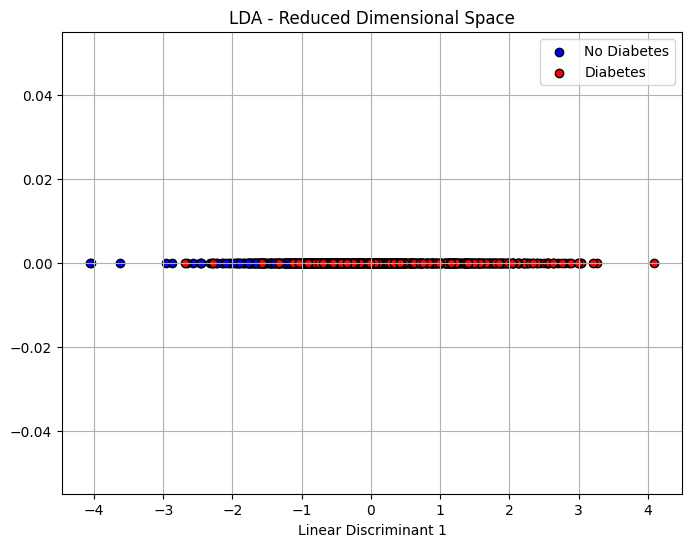

In [67]:
plt.figure(figsize=(8, 6))
targets = [0, 1]
colors = ['blue', 'red']
for target, color in zip(targets, colors):
    indices_to_keep = final_df['Outcome'] == target
    plt.scatter(final_df.loc[indices_to_keep, 'LD1'],
                [0] * sum(indices_to_keep),
                c=color,
                label=target,
                edgecolor='k')
plt.xlabel('Linear Discriminant 1')
plt.title('LDA - Reduced Dimensional Space')
plt.legend(['No Diabetes', 'Diabetes'])
plt.grid(True)
plt.show()


In [68]:
#Initializing the classifiers
knn = KNeighborsClassifier()
random_forest = RandomForestClassifier(random_state = 42)
decision_tree = DecisionTreeClassifier(random_state = 42)

In [69]:

knn.fit(X_train_pca, y_train)
knn_pred_pca = knn.predict(X_test_pca)
accuracy_knn_pca = accuracy_score(y_test, knn_pred_pca)
print(f"KNN after PCA - Accuracy Score: {accuracy_knn_pca:.4f}")

random_forest.fit(X_train_pca, y_train)
rf_pred_pca = random_forest.predict(X_test_pca)
accuracy_rf_pca = accuracy_score(y_test, rf_pred_pca)
print(f"Random Forest after PCA - Accuracy Score: {accuracy_rf_pca:.4f}")

decision_tree.fit(X_train_pca, y_train)
dt_pred_pca = decision_tree.predict(X_test_pca)
accuracy_dt_pca = accuracy_score(y_test, dt_pred_pca)
print(f"Decision Tree after PCA - Accuracy Score: {accuracy_dt_pca:.4f}")

KNN after PCA - Accuracy Score: 0.6429
Random Forest after PCA - Accuracy Score: 0.6688
Decision Tree after PCA - Accuracy Score: 0.6299


In [70]:
knn.fit(X_train_lda, y_train)
knn_pred_lda = knn.predict(X_test_lda)
accuracy_knn_lda = accuracy_score(y_test, knn_pred_lda)
print(f"KNN after LDA - Accuracy Score: {accuracy_knn_lda:.4f}")

random_forest.fit(X_train_lda, y_train)
rf_pred_lda = random_forest.predict(X_test_lda)
accuracy_rf_lda = accuracy_score(y_test, rf_pred_lda)
print(f"Random Forest after LDA - Accuracy Score: {accuracy_rf_lda:.4f}")

decision_tree.fit(X_train_lda, y_train)
dt_pred_lda = decision_tree.predict(X_test_lda)
accuracy_dt_lda = accuracy_score(y_test, dt_pred_lda)
print(f"Decision Tree after LDA - Accuracy Score: {accuracy_dt_lda:.4f}")

KNN after LDA - Accuracy Score: 0.7273
Random Forest after LDA - Accuracy Score: 0.7597
Decision Tree after LDA - Accuracy Score: 0.7597


 These are the accuracy scores of KNN, Random Forest, and Decision Tree after performing Linear Discriminant Analysis.

LDA appears to be superior to PCA for the Pima Diabetes dataset.  